In [5]:
from keras.datasets import mnist
import numpy as np

In [6]:
(train_data, train_labels), _ = mnist.load_data()
train_data = train_data.reshape((train_data.shape[0], -1))
train_data = train_data.astype(np.float32) / 255

train_data_with_noise = np.concatenate([
    train_data,
    np.random.random(train_data.shape)
], axis=1)

train_data_with_zero = np.concatenate([
    train_data,
    np.zeros(train_data.shape)
], axis=1)

In [7]:
from keras import layers, activations, optimizers, losses, metrics

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation=activations.relu),
        layers.Dense(10, activation=activations.softmax)
    ])
    model.compile(optimizer=optimizers.RMSprop(),
                  loss=losses.sparse_categorical_crossentropy,
                  metrics=[metrics.sparse_categorical_accuracy])
    return model

model = get_model()
history = model.fit(train_data, train_labels, epochs=10, batch_size=128, validation_split=0.2)

model = get_model()
history_noise = model.fit(train_data_with_noise, train_labels, epochs=10, batch_size=128, validation_split=0.2)

model = get_model()
history_zero = model.fit(train_data_with_zero, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 0.2947 - sparse_categorical_accuracy: 0.9149 - val_loss: 0.1511 - val_sparse_categorical_accuracy: 0.9567
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1229 - sparse_categorical_accuracy: 0.9644 - val_loss: 0.1170 - val_sparse_categorical_accuracy: 0.9656
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0815 - sparse_categorical_accuracy: 0.9762 - val_loss: 0.0956 - val_sparse_categorical_accuracy: 0.9716
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0584 - sparse_categorical_accuracy: 0.9831 - val_loss: 0.0816 - val_sparse_categorical_accuracy: 0.9757
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0445 - sparse_categorical_accuracy: 0.9871 - val_loss: 0.0835 - val_sparse_categorical_accuracy: 0.9752
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0324 - sparse_categorica

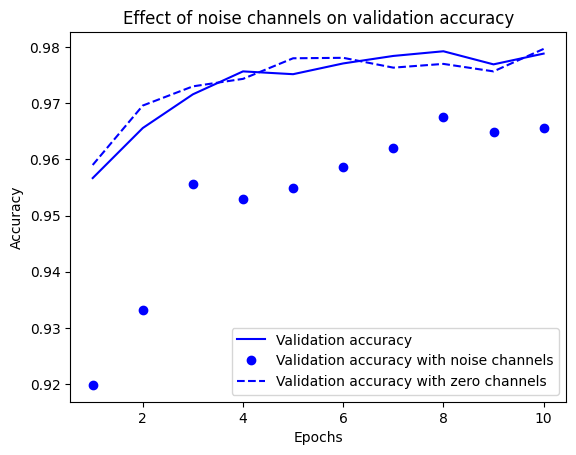

In [10]:
import matplotlib.pyplot as plt

val_acc = history.history['val_sparse_categorical_accuracy']
val_acc_noise = history_noise.history['val_sparse_categorical_accuracy']
val_acc_zero = history_zero.history['val_sparse_categorical_accuracy']

epochs = range(1, 11)

plt.plot(epochs, val_acc, 'b-', label='Validation accuracy')
plt.plot(epochs, val_acc_noise, 'bo', label='Validation accuracy with noise channels')
plt.plot(epochs, val_acc_zero, 'b--', label='Validation accuracy with zero channels')

plt.title('Effect of noise channels on validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

0.0
15681541.29193439
0.0
Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 0.6194 - accuracy: 0.8117 - val_loss: 0.2479 - val_accuracy: 0.9263
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2620 - accuracy: 0.9182 - val_loss: 0.1860 - val_accuracy: 0.9440
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1730 - accuracy: 0.9460 - val_loss: 0.1501 - val_accuracy: 0.9570
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1230 - accuracy: 0.9617 - val_loss: 0.1380 - val_accuracy: 0.9599
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0897 - accuracy: 0.9722 - val_loss: 0.1383 - val_accuracy: 0.9602
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0681 - accuracy: 0.9781 - val_loss: 0.1409 - val_accuracy: 0.9579
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0499 - accuracy: 0.9835 - val_loss: 0.1240 - v

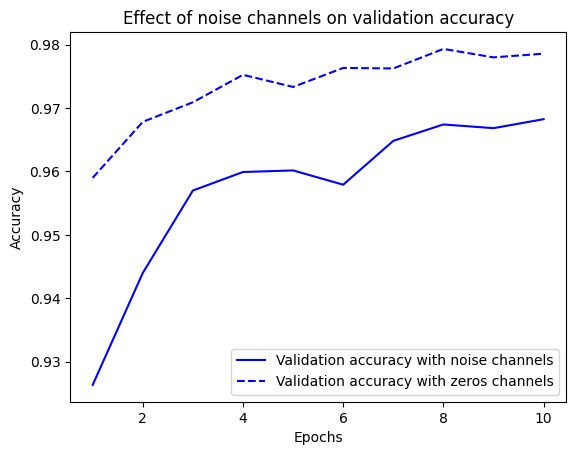

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
print(np.sum(np.abs(train_data - train_images)))

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)
print(np.sum(np.abs(train_data_with_noise - train_images_with_noise_channels)))


train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)
print(np.sum(np.abs(train_data_with_zero - train_images_with_zeros_channels)))

from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)



import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()